In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

### Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

## 1. Frequency Tabñes

In [7]:
df['category'].nunique()

296

In [5]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

- **top 5**: Sports & Outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body, Birthday Gifts   

In [8]:
frequency_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

## 2. Visualizations
- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

C:\Users\Carlota\AppData\Local\Temp\ipykernel_11956\3598881981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frequency_table.head(10).index, y=frequency_table.head(10).values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_11956\3598881981.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(frequency_table.head(10).index, rotation=30, ha='right', fontsize=12)


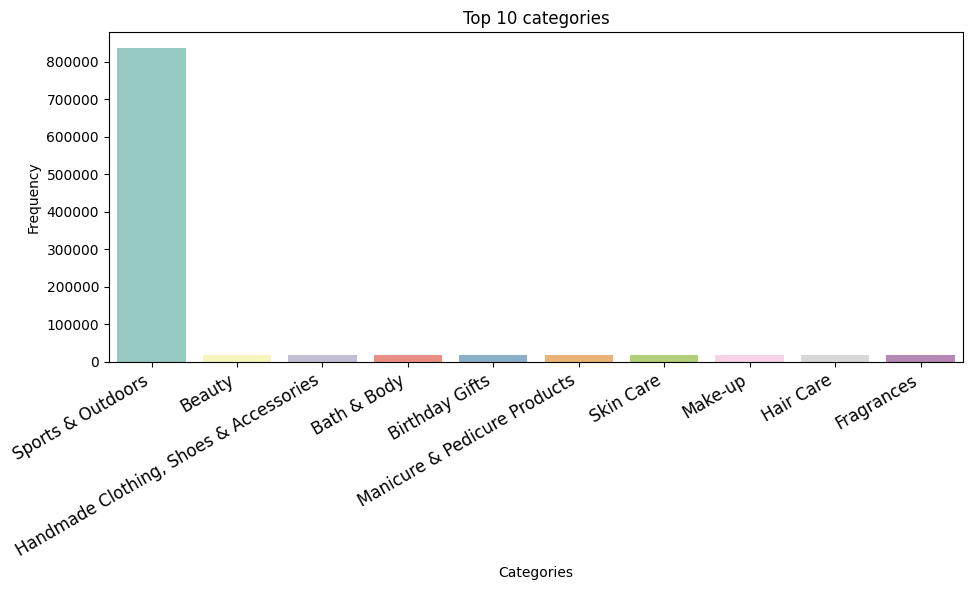

In [21]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x=frequency_table.head(10).index, y=frequency_table.head(10).values, palette="Set3");

ax.set_title("Top 10 categories")
ax.set_xlabel("Categories")
ax.set_ylabel("Frequency")
ax.set_xticklabels(frequency_table.head(10).index, rotation=30, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

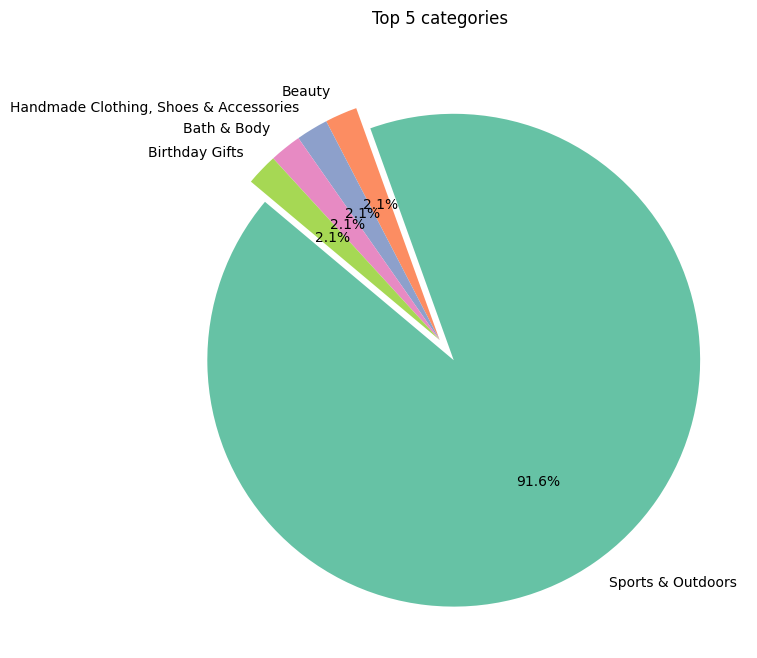

In [28]:
num = 5
top_10_categories = frequency_table.head(num)
labels = top_10_categories.index
sizes = top_10_categories.values

# Plot

colors = sns.color_palette("Set2", len(sizes))
plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Display percentages
    startangle=140,     # Rotate the chart for better readability
    colors=colors,
    explode=[0.1] + [0] * (len(sizes) - 1)
)
plt.title("Top 5 categories")
plt.show()

Sports and outdoors dominates the listing

### Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### 1. Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [34]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f'Mean price {mean_price}')
print(f'Median price {median_price}')
print(f'Mode price  {mode_price}')

Mean price 89.24380943923663
Median price 19.09
Mode price  9.99


The average price is higher than the median price and the mode price

### 2. Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [35]:
variance_price = df['price'].var()
standard_deviation_price = df['price'].std()
max_price = df['price'].max()
min_price = df['price'].min()
range_price = max_price - min_price
interquartile_range = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f'Variance: {variance_price}')
print(f'Standard deviation: {standard_deviation_price}')
print(f'Range: {range_price}')
print(f'Interquartile range: {interquartile_range}')

Variance: 119445.48532254907
Standard deviation: 345.60886175349884
Range: 100000.0
Interquartile range: 36.0


There are so many outliers due to the fact the interquartile range is very smaller than price range

### 3. Visualizations:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [36]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(np.float64(27.492977566280338), np.float64(4241.616412866518))

In [40]:
df.shape

(2443651, 9)

Text(0.5, 1.0, 'Distribution of Product Prices')

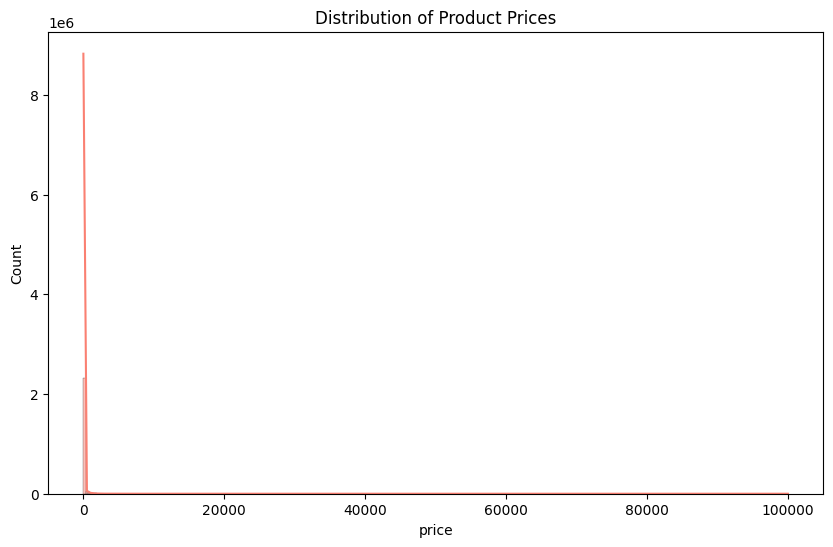

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins=300, color="salmon")
plt.title('Distribution of Product Prices')

In [47]:
df_500 = df[df['price']<500]['price']

Text(0.5, 1.0, 'Distribution of Product Prices lowest than 500')

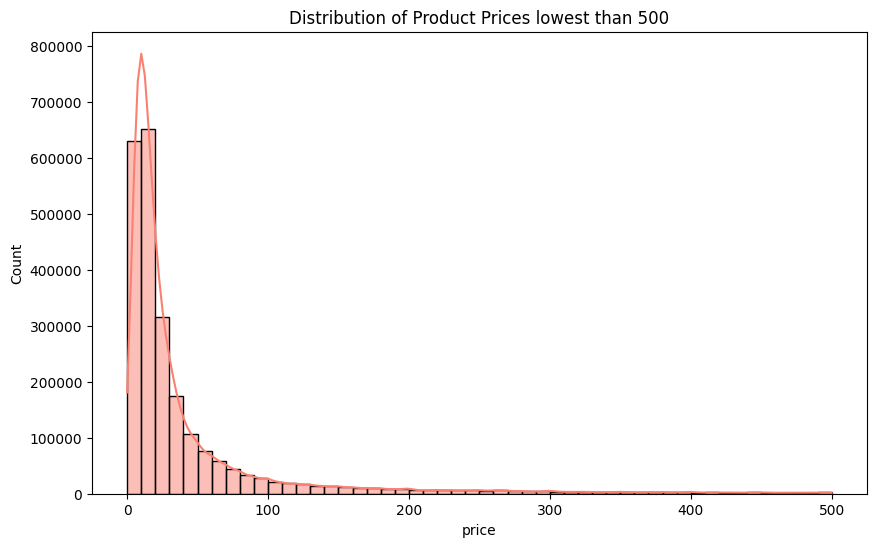

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(df_500, kde=True, bins=50, color="salmon")
plt.title('Distribution of Product Prices lowest than 500')

In [ ]:
df['price'].value_counts()

price
9.99      48922
12.99     38823
8.99      34058
7.99      33632
14.99     32570
          ...  
516.81        1
427.90        1
494.74        1
528.07        1
370.37        1
Name: count, Length: 82916, dtype: int64

We can observe that the mayority of the product are lower than 20 euros

<Axes: ylabel='price'>

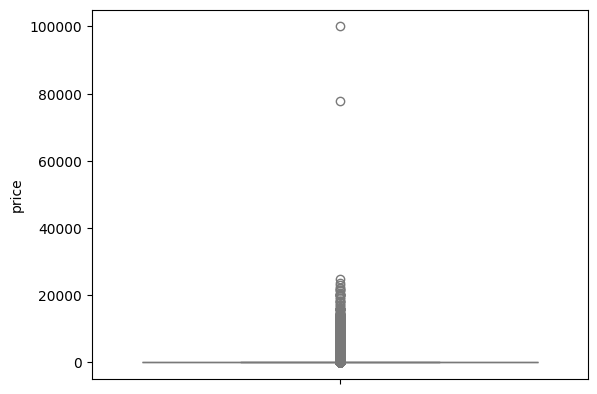

In [38]:
sns.boxplot(data = df['price'], color="lightblue")

<Axes: ylabel='price'>

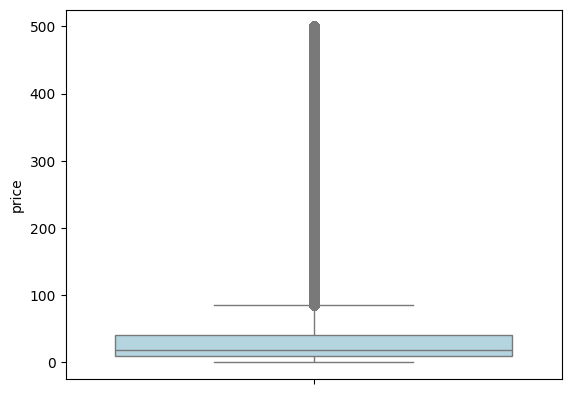

In [55]:
sns.boxplot(data = df_500, color="lightblue")

Obviously, there are a lot of products higher than the rest

In [57]:
sorted_prices =df.sort_values(by='price', ascending = False)

In [ ]:
sorted_prices.head(10) # there are the top outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.00,False,0,Sports & Outdoors
1987238,2235317,B0CDVKNBRV,Générique L.A 350° - I5 11400F - RTX 3050 8G -...,0.0,0,77752.00,False,0,Desktop PCs
1905315,2136904,B0CJSNFYVM,Abaodam decor christmas ornaments Desk Ornamen...,0.0,0,24674.59,False,0,Garden Storage & Housing
1408966,1551117,B0CHT331TN,BM4445-FI1-01200R10-03-E03 Driver,0.0,0,23482.73,False,0,Scanners & Accessories
319555,340285,B0CHYG6MNW,HEDUSA Halloween 3D Holographic Fan 3D Hologra...,0.0,0,22933.42,False,0,Projectors
1490285,1651376,B08M36F6S2,YXHUI Kids Girls Figure Skating Dress Long Sle...,0.0,0,21999.00,False,0,Sports & Outdoors
1490286,1651377,B08M31N65K,YXHUI Kids Girls Figure Skating Dress Long Sle...,0.0,0,21999.00,False,0,Sports & Outdoors
1907271,2138945,B0C8MWJRSH,Outdoor Furniture Wood Porch Swing Black Brown...,0.0,0,21464.82,False,0,Garden Storage & Housing
1907273,2138947,B0C8MVKYW2,Outdoor Furniture Wood Porch Swing Black Brown...,0.0,0,21464.82,False,0,Garden Storage & Housing
1907272,2138946,B0C8MVQB8R,Outdoor Furniture Wood Porch Swing Black Brown...,0.0,0,21464.82,False,0,Garden Storage & Housing


### Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### 1. Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [62]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f'Mean rating {mean_rating}')
print(f'Median rating {median_rating}')
print(f'Mode rating  {mode_rating}')

Mean rating 2.152836472966065
Median rating 0.0
Mode rating  0.0


Normaly, customers rate products by 0

### 2. Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [64]:
variance_rating = df['stars'].var()
standard_deviation_rating = df['stars'].std()
max_rating = df['stars'].max()
min_rating = df['stars'].min()
range_rating = max_rating - min_rating
interquartile_range = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f'Variance: {variance_rating}')
print(f'Standard deviation: {standard_deviation_rating}')
print(f'Range: {range_rating}')
print(f'Interquartile range: {interquartile_range}')

Variance: 4.817434029796862
Standard deviation: 2.1948653785134207
Range: 5.0
Interquartile range: 4.4


The ratings are very consistent because there aren't so many difference between the range and interquartile range

### 3. Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [66]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

skewness is almost 0 so the distribution is very simetric, so the distribution are normal so mean, mode and median are so near. 
Furthermore, value of kurtosis is negative so there are fewer outlier of rating and that indicates the distribution lean towards lower values. 

### 4. Visualizations:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

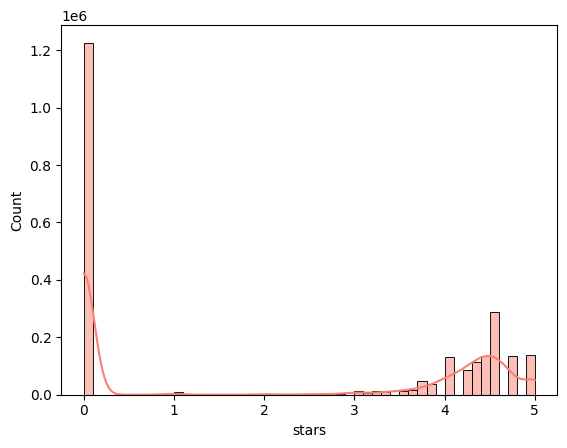

In [69]:
sns.histplot(df['stars'], kde=True, bins = 50, color="salmon")

the most common rating is 0